# Recombinant Haplotypes

In [1]:
# Import packages.
import analysis_functions as af
import allel
import matplotlib
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
# Print version numbers.
print('allel', allel.__version__)
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)

allel 1.3.5
matplotlib 3.5.2
numpy 1.22.3


In [2]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'figure.facecolor': 'white',
    'font.family': 'serif',
    'axes.spines.top': True,
    'axes.spines.right': True,
})

In [3]:
# Intialzie the recombinant individuals.
rec_72kb_inds = np.loadtxt('../meta_data/72kb_all_rec_int_idx.csv', delimiter=',', dtype=int)
# Intialize the recombinant haplotype indicies.
rec_72kb_hap_1 = np.loadtxt('../meta_data/72kb_rec_like_hap_1_idx.csv', delimiter=',', dtype=int)
rec_72kb_hap_2 = [np.loadtxt('../meta_data/72kb_rec_like_hap_2_idx.csv', delimiter=',', dtype=int)]

In [4]:
# Load the genotype matrix.
tgp_72kb_gt, tgp_72kb_pos = af.load_hap_region('tgp_mod_arc_anc', 12, 40758000, 40830000)
# Polarize the genotype matrix
tgp_72kb_p_gt = af.polarize_gt(tgp_72kb_gt)

In [5]:
# Determine the indicies with genotype calls for the Altai Nean. and Denisovan.
call_mask = (tgp_72kb_p_gt.take([2347, 2350], axis=1).is_called() == True).any(axis=1)
# Determine the indicies for variable sites between the focal individuals and the focal archaics.
var_mask = tgp_72kb_p_gt.compress(call_mask, axis=0).take(rec_72kb_inds.tolist()+[2347, 2350], axis=1).count_alleles().is_variant()
# Subset the genotype matrix.
rec_72kb_p_gt = tgp_72kb_p_gt.compress(call_mask, axis=0).compress(var_mask, axis=0)

In [6]:
# Extract the Denisovan and Altai Nean. sequence.
den_seq = rec_72kb_p_gt[:, 2350, :].mean(axis=1)
alt_seq = rec_72kb_p_gt[:, 2347, :].mean(axis=1)
# Intialize the matrix to plot.
rec_mat = np.empty((rec_72kb_inds.size+2, rec_72kb_p_gt.shape[0]))
# Append the Denisovan.
rec_mat[0, :] = den_seq
# Append the recombinant individuals.
rec_mat[1, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[0], 0]
rec_mat[2, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[1], 0]
rec_mat[3, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[2], 0]
rec_mat[4, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[3], 0]
rec_mat[5, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[4], 0]
rec_mat[6, :] = rec_72kb_p_gt[:, rec_72kb_hap_1[5], 0]
rec_mat[7, :] = rec_72kb_p_gt[:, rec_72kb_hap_2[0], 1]
# Append the Altai Nean.
rec_mat[8, :] = alt_seq

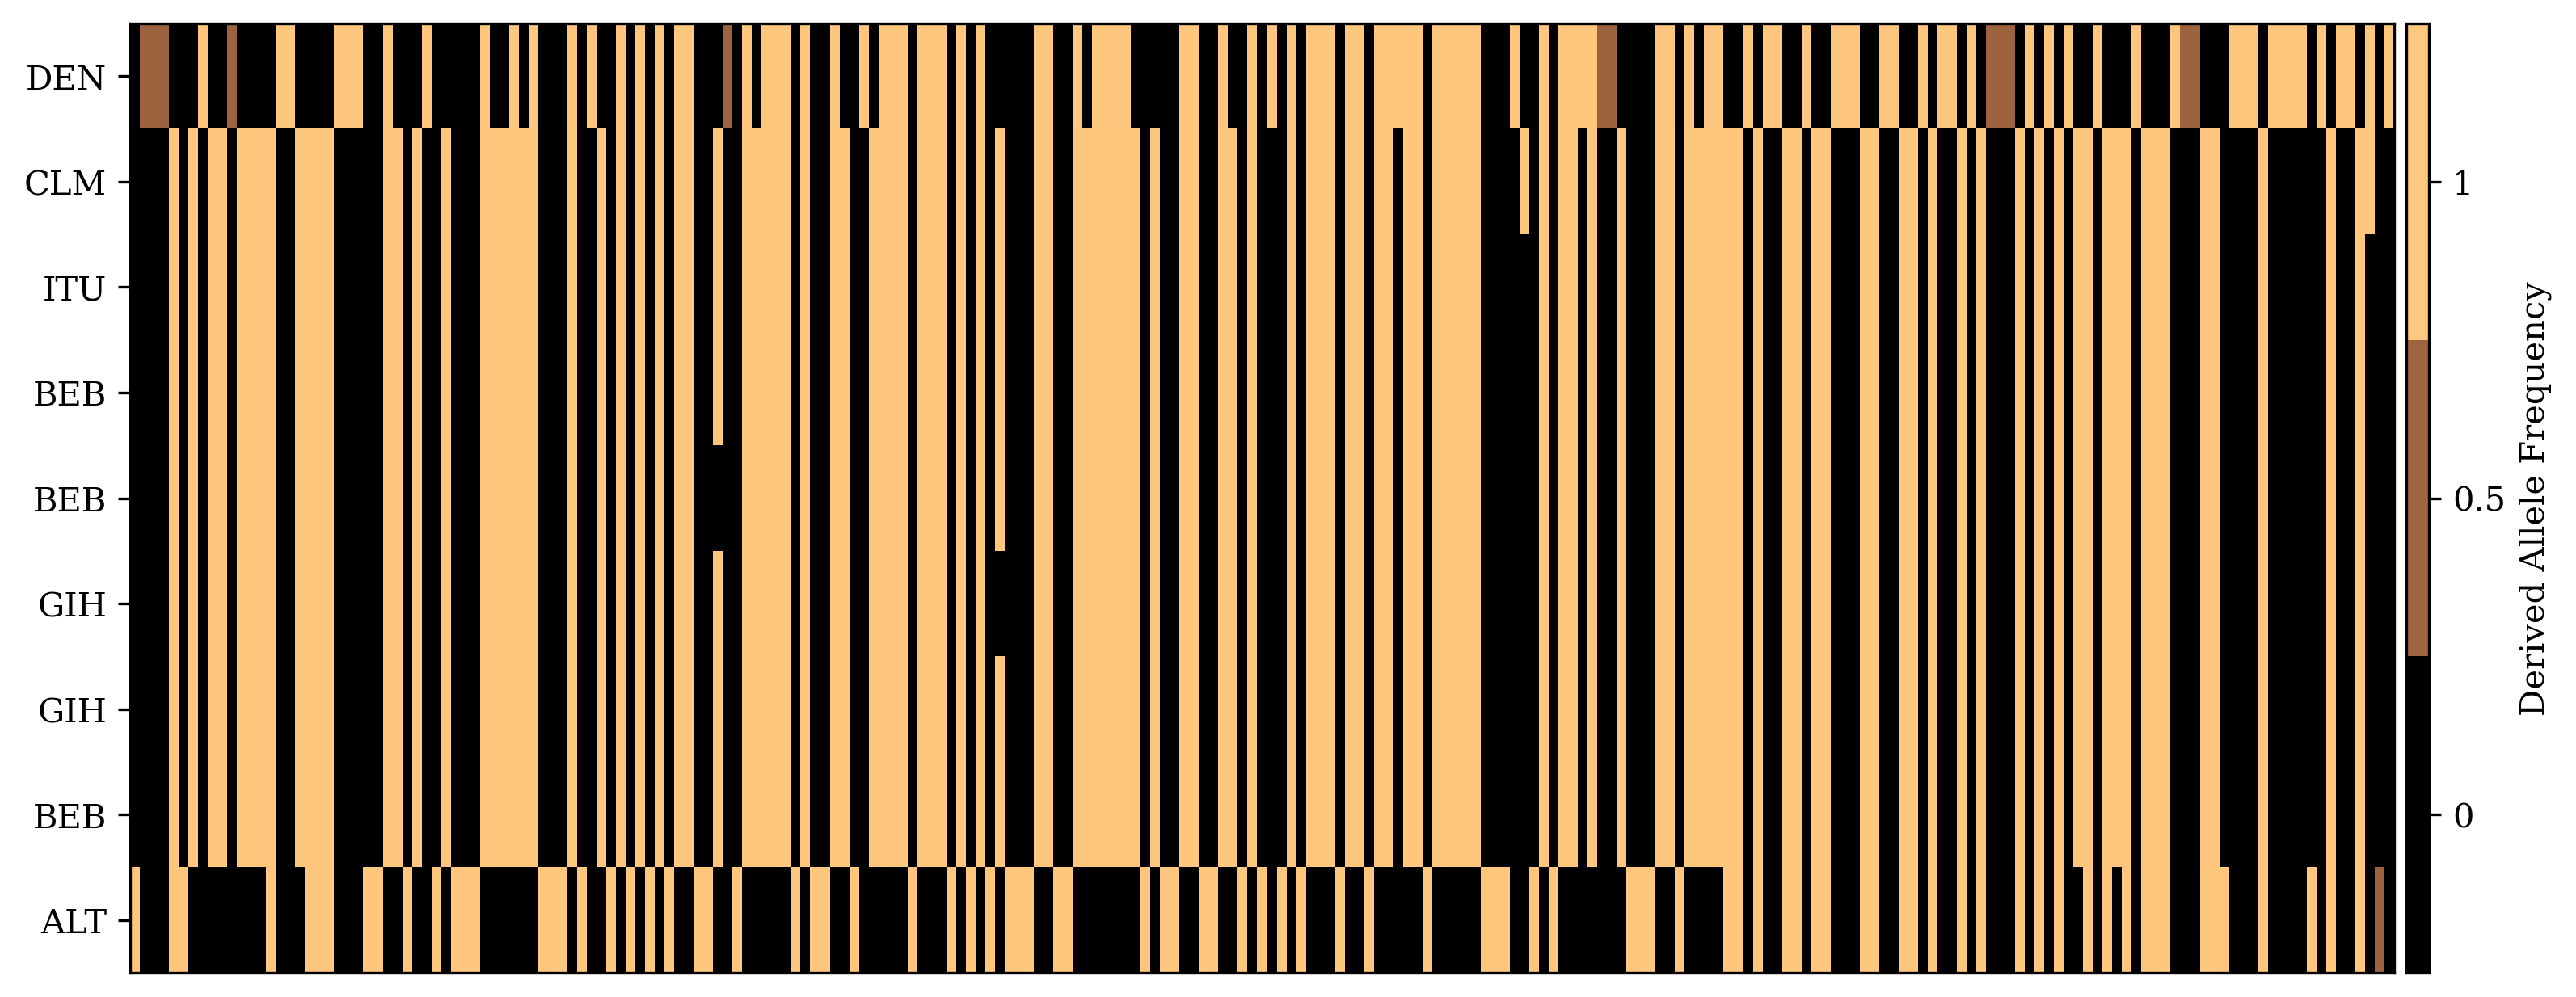

In [7]:
# Determine the indicies where everyone is not fixed...
plot_idx = np.where(~((rec_mat.sum(axis=0) == 0) | (rec_mat.sum(axis=0) == rec_mat.shape[0])))[0]
# Intialize the labels.
pop_labels = [
    'DEN', 'CLM', 'ITU',
    'BEB', 'BEB', 'GIH',
    'GIH', 'BEB', 'ALT',
]
# Intialize the figure.
fig = plt.figure(
    figsize=(10, 4), dpi=300,
)
# Intialize color map.
cmap = matplotlib.cm.get_cmap('copper', 3)
# Intialize the bounds for the color map.
bounds = np.linspace(0, 1, 4)
# Intialzie the cmap and bounds normalization.
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the weird haplotypes.
im = ax.imshow(
    rec_mat[:, plot_idx], aspect='auto',
    norm=norm, cmap=cmap,
)
# Label the rows.
ax.set_yticks(
    np.arange(rec_mat.shape[0]),
    labels=pop_labels, size=10,
)
# Remove the ticks.
ax.tick_params(bottom=False, labelbottom=False)
ax.tick_params(which='minor', left=False, bottom=False, labelbottom=False)
# Add a border.
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
# Intialize the positions for the colobar.
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='1%', pad=0.05)
# Plot the color bar.
cbar = fig.colorbar(
    im, cax=cax,
    ticks=[(bounds[idx] + bounds[idx+1])/2 for idx in range(bounds.size - 1)],
)
# Annotate the colobar.
cbar.set_label('Derived Allele Frequency', size=10)
cbar.ax.set_yticklabels(['0', '0.5', '1'], size=10)
# Show the plot.
plt.show()

In [8]:
# Show the total number of sites in the plot above.
plot_idx.size

233